In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
df = pd.read_csv('/content/drive/MyDrive/woc/Classification_train.csv')
x_train = np.array(df.iloc[0:20000,1:], dtype="int")/256
y_train =np.array(df.iloc[0:20000,0:1], dtype="int")
x_test=np.array(df.iloc[20000:,1:], dtype="int")/256
y_test=np.array(df.iloc[20000:,0:1], dtype="int")
print(x_train.shape,y_train.shape)

(20000, 784) (20000, 1)


In [11]:
class LogReg:
  def __init__(self,alpha,iterations):
      self.alpha=alpha
      self.iterations=iterations
      self.w=None
  def one_hotcode(self,y):
      Yh=np.zeros((len(y),len(np.unique(y))))
      for i in range(len(y)):
        Yh[i][y[i]]=1
      return Yh
  def softmax(self,x):
      max_val = np.max(x, axis=1, keepdims=True)
      self.exp=np.exp(x-max_val)
      self.sum_exp=np.sum(np.exp(x-max_val),axis=1).reshape(-1,1)
      return self.exp/self.sum_exp
  def Train(self,X,y):
      m=X.shape[0]
      n=X.shape[1]
      self.unique=np.unique(y)
      self.w=np.zeros((len(self.unique),n))
      y=self.one_hotcode(y)
      L=[]
      for i in range(self.iterations):
         #if i%10==0:
          #print(i,self.score(X,y))
         scores=np.dot(X,self.w.T)
         predictions=self.softmax(scores)
         #predictions = np.clip(predictions, 1e-10, 1.0 - 1e-10)
         loss= -np.sum(y*np.log(predictions))/m
         L.append(loss)
         error=predictions-y
         gradient=np.dot(error.T,X)/m
         self.w-= (self.alpha*gradient)
      plt.plot(np.arange(self.iterations),L)
      plt.xlabel("Iterations")
      plt.ylabel("CE Loss")
      return self.w
  def prob(self,x):
      scores=np.dot(x,self.w.T)
      return self.softmax(scores)
  def Predict(self,X):
      return np.argmax(self.prob(X), axis=1).reshape(-1,1)
  def Accuracy(self,x,y):
      return print(np.mean(self.Predict(x)==y)*100,"% Accuracy")


95.98 % Accuracy
None


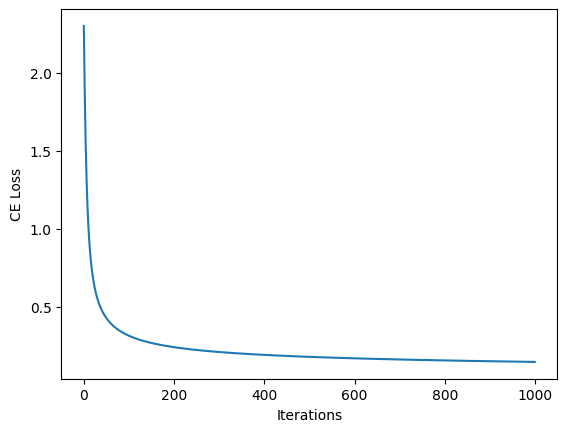

In [12]:
logreg = LogReg(0.3,1000)
logreg.Train(x_train, y_train)
print(logreg.Accuracy(x_test, y_test))

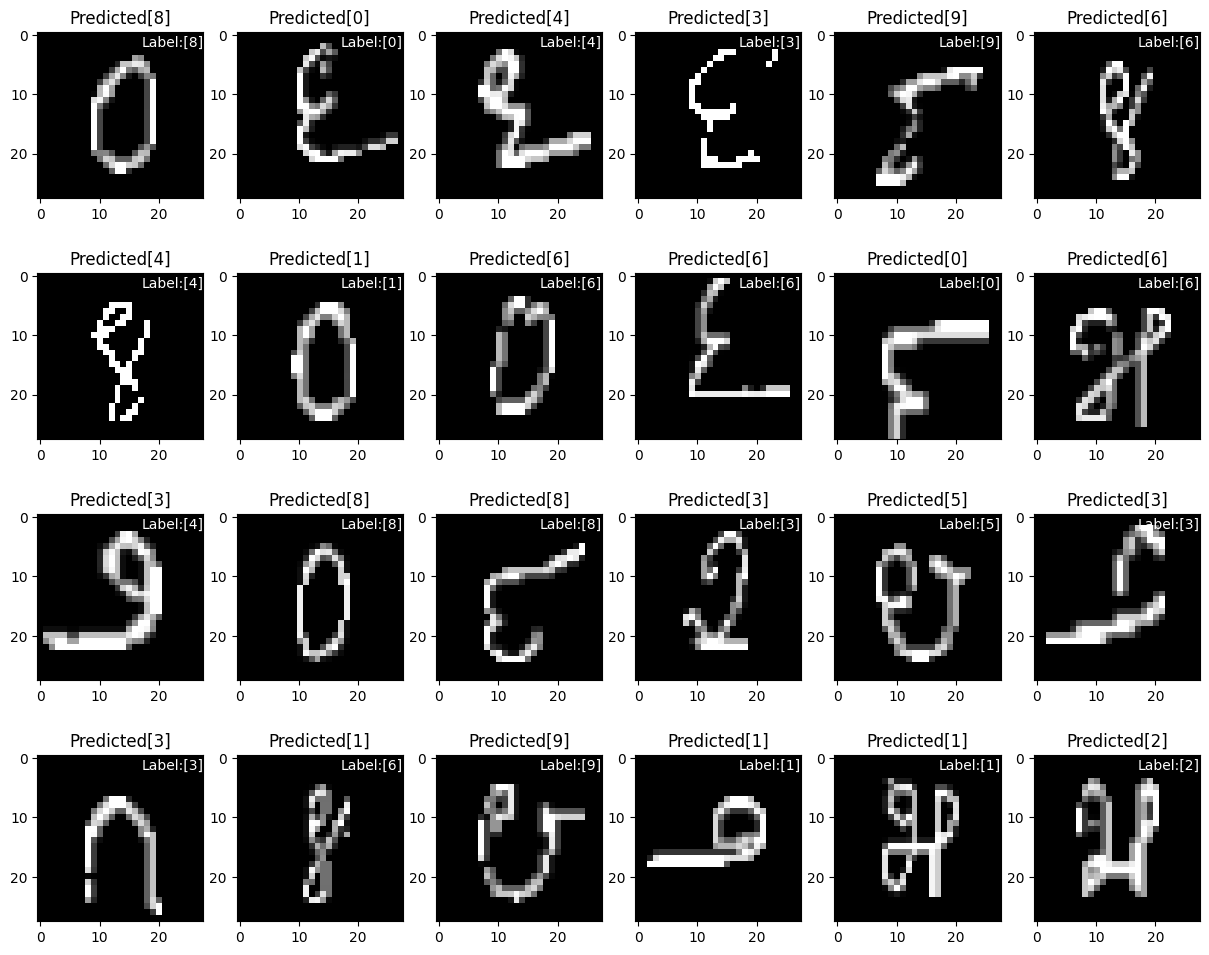

In [13]:
plt.figure(figsize=(15,12))
for i in range(24):
    image=np.array(df.iloc[5000+i:5000+i+1,1:], dtype="int").reshape(28,28)
    labels=y_test[i]
    plt.subplot2grid((4,6),(i//6,i%6)).imshow(image,cmap='gray')
    plt.text(17,2,f"Label:{labels}",color="white")
    plt.title(f"Predicted{logreg.Predict(x_test)[i]}")